In [130]:
import numpy as np
from numpy import random
import pandas as pd
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
data=pd.read_csv('iris.data', header=None)
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print (data.describe())
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


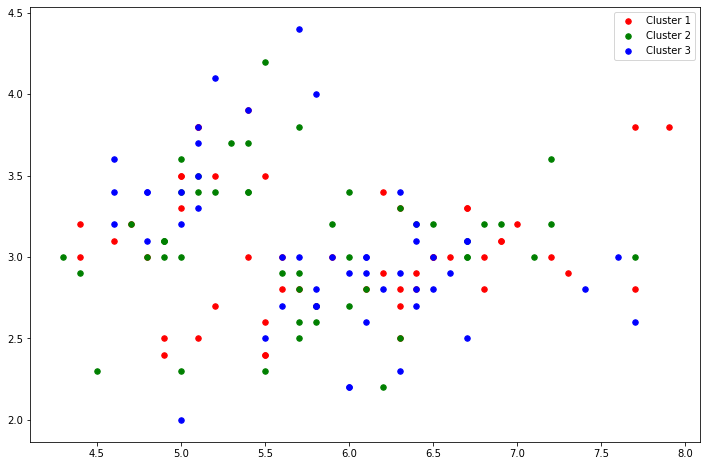

In [137]:
clusters=[]
clusters.append(X[0:50,:])
clusters.append(X[51:100,:])
clusters.append(X[101:150,:])


np.random.shuffle(X)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(clusters[0][:,0], clusters[0][:,1], s=30, color='r', label='Cluster 1')
ax.scatter(clusters[1][:,0], clusters[1][:,1], s=30, color='g', label='Cluster 2')
ax.scatter(clusters[2][:,0], clusters[2][:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [138]:
k=len(clusters)
centroids=[]
for i in range (0,k):
    centroids.append(clusters[i][random.randint(0,49)])

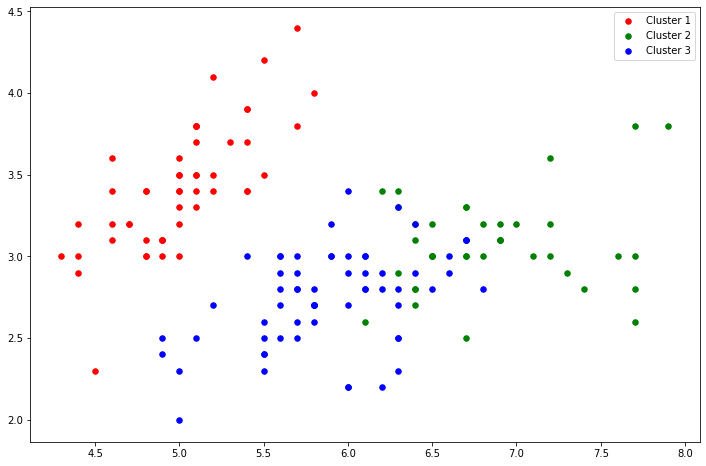

In [140]:
def Euclidean_Distance(Observe,Actual):
        distance=0
        for x in range(len(Observe)):
            distance += pow((Observe[x] - Actual[x]), 2)
        return math.sqrt(distance)
def UpdateCentroids(centroids,clusters,k):
    for i in range(0,k):
        centroids[i]=np.mean(clusters[i],axis=0)
stable_centroids=False
#print(clusters)
it=0
maxItr=1000
min_dist=100000000000
while(stable_centroids==True or it<maxItr):
    clusters_new=[]
    clusters_new.append([[0.0,0.0,0.0,0.0]])
    clusters_new.append([[0.0,0.0,0.0,0.0]])
    clusters_new.append([[0.0,0.0,0.0,0.0]])
    for i in X:
        for j in range(0,3):
            distance=Euclidean_Distance(i,centroids[j])
            if(distance<min_dist):
                min_dist=distance
                min_centroid=j
        clusters_new[min_centroid]=np.insert(clusters_new[min_centroid],-1,i,axis=0)
        min_dist=100000000000
    for j in range(0,3):
            if(len(clusters_new)>1):
                clusters_new[j]=np.delete(clusters_new[j],-1,axis=0)
    if(np.array_equal(clusters,clusters_new)):
        stable_centroids=True
    
    else:
        clusters=clusters_new.copy()
        UpdateCentroids(centroids,clusters,k)
    it+=1
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(clusters[0][:,0], clusters[0][:,1], s=30, color='r', label='Cluster 1')
ax.scatter(clusters[1][:,0], clusters[1][:,1], s=30, color='g', label='Cluster 2')
ax.scatter(clusters[2][:,0], clusters[2][:,1], s=30, color='b', label='Cluster 3')
ax.legend()